In [ ]:
from keras.datasets import mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from numpy.linalg import inv,pinv

In [ ]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

11490434/11490434 [==============================] - 0s 0us/step
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [ ]:
train_X.view()

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
train_y.view()

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
print(np.unique(train_y, return_counts=True))
classes = np.unique(train_y)
no_classes = len(classes)

print(classes)
print(no_classes)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))
[0 1 2 3 4 5 6 7 8 9]
10


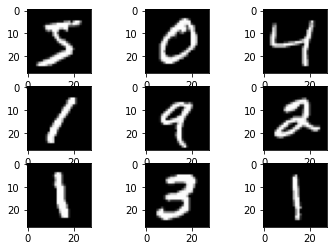

In [ ]:
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))

In [ ]:
print(train_X.mean())
train_X = train_X / 255
mean = train_X.mean()
print(mean)

test_X = test_X / 255

33.318421449829934
0.1306604762738429


In [ ]:
trx1 = train_X.copy()
try1 = train_y.copy()
trx2 = train_X.copy()
try2 = train_y.copy()

tsx1 = test_X.copy()
tsy1 = test_y.copy()
tsx2 = test_X.copy()
tsy2 = test_y.copy()

print(str(trx1.shape),str(try1.shape))
print(str(trx2.shape),str(try2.shape))
print(str(tsx1.shape),str(tsy1.shape))
print(str(tsx2.shape),str(tsy2.shape))

(60000, 28, 28) (60000,)
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
(10000, 28, 28) (10000,)


In [ ]:
data = {}

for i, j in zip(trx1, try1):
  if j in classes:
    if j not in data:
      data[j] = [i.flatten()]
    else:
      data[j].append(i.flatten())

for i in classes:
  data[i] = np.asarray(data[i])

for key,value in data.items():
  print(key,len(value))

print(len(data[0][0]))

5 5421
0 5923
4 5842
1 6742
9 5949
2 5958
3 6131
6 5918
7 6265
8 5851
784


In [ ]:
class_means = {}

for class_id, values in data.items():
      class_means[class_id] = np.mean(values, axis=0)

print(class_means)

{5: array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
  

In [ ]:
sk = []

for class_id, mean_vector in class_means.items():
      s = np.subtract(data[class_id], mean_vector)
      sk.append(np.dot(np.transpose(s), s))

In [ ]:
sk = np.asarray(sk)
sw = np.sum(sk, axis=0)

print(sw)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
nk = {}
sum = 0
for class_id, value in data.items():
  nk[class_id] = value.shape[0]
  sum += np.sum(value, axis=0)

print(nk)

N = 60000

m = sum / N
print(m)

{5: 5421, 0: 5923, 4: 5842, 1: 6742, 9: 5949, 2: 5958, 3: 6131, 6: 5918, 7: 6265, 8: 5851}
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 8.23529412e-06 3.07189542e-05 1.41176471e-05 5.88235294e-07
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.04575163e-06 3.59477124e-06 3.64052288e-05 9.52287582e-05
 1.71437908e-04 2.51372549e-04 4.71111111e-04 6.30326797e-04
 6.83071895e-04 6.95816993e-04 7.42418301e-04 6.82941176e-04
 7.33071895e-04 6.02549020e-04 3.92614379e-04 2.79346405e-04
 2.11045752e-04 8.37908497e-05 3.95424837e-05 1.38562092e-05
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.18300654e-06 2.7450980

In [ ]:
sb = []
for class_id, mean_vector in class_means.items():
  s = mean_vector - m
  sb.append(np.multiply(nk[class_id], np.outer(s, s.T)))
    
sb = np.sum(sb, axis=0)

print(sb)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
mat = np.dot(pinv(sw), sb)

eigen_values, eigen_vectors = np.linalg.eig(mat)
eiglist = [(eigen_values[i], eigen_vectors[:, i]) for i in range(len(eigen_values))]
eiglist = sorted(eiglist, key=lambda x: x[0], reverse=True)

In [ ]:
W = np.array([eiglist[i][1] for i in range(2)])
W = np.asarray(W).T

print(W)

[[0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]


In [ ]:
means = {}
covariance = {}
priors = {}

for class_id, values in data.items():
  proj = np.dot(values, W)
  means[class_id] = np.mean(proj, axis=0)
  covariance[class_id] = np.cov(proj, rowvar=False)
  priors[class_id] = values.shape[0] / N

print("Means: ", means)
print("Covariance: ",covariance)
print("Priors: ", priors)

Means:  {5: array([-0.00888454+0.j,  0.00245902+0.j]), 0: array([-0.02676009+0.j,  0.02668783+0.j]), 4: array([0.01100066+0.j, 0.00961728+0.j]), 1: array([ 0.0017983 +0.j, -0.04156634+0.j]), 9: array([0.01788016+0.j, 0.01058523+0.j]), 2: array([-0.01136934+0.j, -0.01432411+0.j]), 3: array([-0.00504206+0.j, -0.01024315+0.j]), 6: array([-0.02012079+0.j,  0.0034312 +0.j]), 7: array([0.02317453+0.j, 0.01440979+0.j]), 8: array([-0.00565978+0.j, -0.00960521+0.j])}
Covariance:  {5: array([[5.43643861e-05+0.j, 1.31230456e-05+0.j],
       [1.31230456e-05+0.j, 8.61118033e-05+0.j]]), 0: array([[ 8.57968233e-05+0.j, -5.82278728e-05+0.j],
       [-5.82278728e-05+0.j,  9.87852553e-05+0.j]]), 4: array([[4.49532260e-05+0.j, 2.95101636e-06+0.j],
       [2.95101636e-06+0.j, 7.18079131e-05+0.j]]), 1: array([[ 1.55640523e-05+0.j, -1.51920525e-06+0.j],
       [-1.51920525e-06+0.j,  7.60980044e-05+0.j]]), 9: array([[6.06666204e-05+0.j, 1.29238597e-05+0.j],
       [1.29238597e-05+0.j, 6.21557461e-05+0.j]]), 

In [ ]:
def gaussian_distribution(x, u, cov):
    scalar = (1. / ((2 * np.pi) ** (x.shape[0] / 2.))) * (1 / np.sqrt(np.linalg.det(cov)))
    x_sub_u = np.subtract(x, u)
    return scalar * np.exp(-np.dot(np.dot(x_sub_u, inv(cov)), x_sub_u.T) / 2.)

In [ ]:
trx1_list = []
try1_list = []
for class_id, value in data.items():
  trx1_list.extend(value)
  try1_list.extend(value.shape[0] * [class_id])
trx1_list = np.asarray(trx1_list)
try1_list = np.asarray(try1_list)


p = np.dot(trx1_list, W)
print(p)
g_ll = []

classes = sorted(list(means.keys()))
print(classes)

for value in p:
      r = []
      for c in classes:
        res = priors[c] * gaussian_distribution(value, means[c], covariance[c])
        r.append(res)

      g_ll.append(r)
      
g_ll = np.asarray(g_ll)
print(g_ll)
predictions = np.argmax(g_ll, axis=1)

[[-0.00915946+0.j  0.00518589+0.j]
 [-0.00920484+0.j -0.01529808+0.j]
 [-0.00398633+0.j -0.00291727+0.j]
 ...
 [-0.00048925+0.j -0.00817131+0.j]
 [-0.00430402+0.j -0.01007716+0.j]
 [-0.01263434+0.j  0.00734821+0.j]]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[[1.67644838e+01+0.j 1.18644783e-05+0.j 4.17392606e+01+0.j ...
  1.62417995e-01+0.j 8.45729065e+01+0.j 6.34231946e-01+0.j]
 [1.77759348e-02+0.j 1.63000285e-01+0.j 1.24913622e+02+0.j ...
  1.47365237e-01+0.j 1.51005197e+02+0.j 2.06585846e-02+0.j]
 [1.98109617e+00+0.j 1.26584645e-02+0.j 7.07240572e+01+0.j ...
  1.61780502e+00+0.j 1.63982270e+02+0.j 2.64456578e+00+0.j]
 ...
 [3.41775595e-01+0.j 3.14110030e-01+0.j 6.39929278e+01+0.j ...
  3.67496698e+00+0.j 1.46515674e+02+0.j 2.54999849e+00+0.j]
 [2.34028792e-01+0.j 2.93659150e-01+0.j 9.55554168e+01+0.j ...
  1.10684751e+00+0.j 1.99935593e+02+0.j 5.36789213e-01+0.j]
 [3.08709504e+01+0.j 2.27798482e-07+0.j 2.98902981e+01+0.j ...
  2.47908479e-02+0.j 4.76267434e+01+0.j 1.11671791e-01+0.j]]


In [ ]:
print(len(g_ll))
print(predictions)
print(try1_list)

60000
[5 3 8 ... 3 3 5]
[5 5 5 ... 8 8 8]


In [ ]:
result = np.sum(predictions == try1_list) / len(try1_list), predictions, p
print(result)

score = result[0]
print("Score:",score)

(0.57645, array([5, 3, 8, ..., 3, 3, 5]), array([[-0.00915946+0.j,  0.00518589+0.j],
       [-0.00920484+0.j, -0.01529808+0.j],
       [-0.00398633+0.j, -0.00291727+0.j],
       ...,
       [-0.00048925+0.j, -0.00817131+0.j],
       [-0.00430402+0.j, -0.01007716+0.j],
       [-0.01263434+0.j,  0.00734821+0.j]]))
Score: 0.57645


In [ ]:
print(np.unique(test_y, return_counts=True))
classes = np.unique(test_y)
no_classes = len(classes)


test_data = {}

for i, j in zip(tsx1, tsy1):
  if j in classes:
    if j not in test_data:
      test_data[j] = [i.flatten()]
    else:
      test_data[j].append(i.flatten())

for i in classes:
  test_data[i] = np.asarray(test_data[i])


tsx1_list = []
tsy1_list = []
for class_id, value in test_data.items():
  tsx1_list.extend(value)
  tsy1_list.extend(value.shape[0] * [class_id])
tsx1_list = np.asarray(trx1_list)
tsy1_list = np.asarray(try1_list)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))


In [ ]:
p = np.dot(tsx1_list, W)
g_ll = []
print(g_ll)
print(means)
classes = sorted(list(means.keys()))

for value in p:
      r = []
      for c in classes:
        res = priors[c] * gaussian_distribution(value, means[c], covariance[c])
        r.append(res)

      g_ll.append(r)
      
g_ll = np.asarray(g_ll)

predictions = np.argmax(g_ll, axis=1)
result = np.sum(predictions == tsy1_list) / len(tsy1_list), predictions, p

[]
{5: array([-0.00888454+0.j,  0.00245902+0.j]), 0: array([-0.02676009+0.j,  0.02668783+0.j]), 4: array([0.01100066+0.j, 0.00961728+0.j]), 1: array([ 0.0017983 +0.j, -0.04156634+0.j]), 9: array([0.01788016+0.j, 0.01058523+0.j]), 2: array([-0.01136934+0.j, -0.01432411+0.j]), 3: array([-0.00504206+0.j, -0.01024315+0.j]), 6: array([-0.02012079+0.j,  0.0034312 +0.j]), 7: array([0.02317453+0.j, 0.01440979+0.j]), 8: array([-0.00565978+0.j, -0.00960521+0.j])}


/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


KeyboardInterrupt: ignored

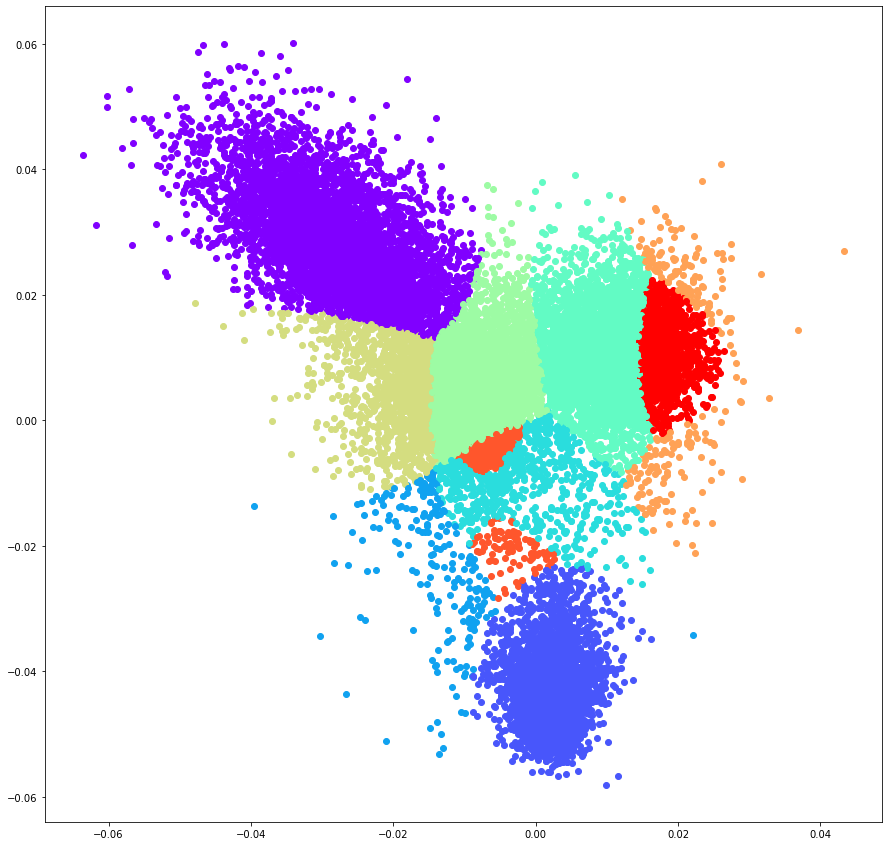

In [ ]:
import matplotlib.cm as cm

classes = list(np.unique(tsy1_list))
colors = cm.rainbow(np.linspace(0, 1, len(classes)))
plotlabels = {classes[c] : colors[c] for c in range(len(classes))}

plt.figure(figsize=(15,15))
for point,pred in zip(p,predictions):
  plt.scatter(point[0],point[1],color=plotlabels[pred])
plt.show()

In [ ]:
W2 = np.array([eiglist[i][1] for i in range(3)])
W2 = np.asarray(W2).T

means = {}
covariance = {}
priors = {}

for class_id, values in data.items():
  proj = np.dot(values, W2)
  means[class_id] = np.mean(proj, axis=0)
  covariance[class_id] = np.cov(proj, rowvar=False)
  priors[class_id] = values.shape[0] / N

print("Means: ", means)
print("Covariance: ",covariance)
print("Priors: ", priors)

Means:  {5: array([-0.00888454+0.j,  0.00245902+0.j, -0.00361522+0.j]), 0: array([-0.02676009+0.j,  0.02668783+0.j, -0.01137035+0.j]), 4: array([0.01100066+0.j, 0.00961728+0.j, 0.0100132 +0.j]), 1: array([ 0.0017983 +0.j, -0.04156634+0.j, -0.00191125+0.j]), 9: array([0.01788016+0.j, 0.01058523+0.j, 0.00319893+0.j]), 2: array([-0.01136934+0.j, -0.01432411+0.j,  0.00116711+0.j]), 3: array([-0.00504206+0.j, -0.01024315+0.j, -0.00853051+0.j]), 6: array([-0.02012079+0.j,  0.0034312 +0.j,  0.02151621+0.j]), 7: array([ 0.02317453+0.j,  0.01440979+0.j, -0.00440759+0.j]), 8: array([-0.00565978+0.j, -0.00960521+0.j, -0.00054459+0.j])}
Covariance:  {5: array([[ 5.43643861e-05+0.j,  1.31230456e-05+0.j, -1.95133559e-06+0.j],
       [ 1.31230456e-05+0.j,  8.61118033e-05+0.j,  9.49308683e-07+0.j],
       [-1.95133559e-06+0.j,  9.49308683e-07+0.j,  3.02826373e-05+0.j]]), 0: array([[ 8.57968233e-05+0.j, -5.82278728e-05+0.j,  1.75864605e-05+0.j],
       [-5.82278728e-05+0.j,  9.87852553e-05+0.j, -1.4396

In [ ]:
tsx2_list = []
tsy2_list = []
for class_id, value in test_data.items():
  tsx2_list.extend(value)
  tsy2_list.extend(value.shape[0] * [class_id])
trx2_list = np.asarray(tsx2_list)
try2_list = np.asarray(tsy2_list)


p = np.dot(tsx2_list, W2)
print(p)
g_ll = []

classes = sorted(list(means.keys()))
print(classes)

for value in p:
      r = []
      for c in classes:
        res = priors[c] * gaussian_distribution(value, means[c], covariance[c])
        r.append(res)

      g_ll.append(r)
      
g_ll = np.asarray(g_ll)
print(g_ll)
predictions = np.argmax(g_ll, axis=1)

result = np.sum(predictions == try2_list) / len(try2_list), predictions, p
print(result)

score = result[0]
print("Score:",score)

[[ 0.02531915+0.j  0.01539345+0.j -0.00865481+0.j]
 [ 0.01420761+0.j  0.01560216+0.j -0.01290067+0.j]
 [ 0.02434611+0.j  0.01001689+0.j -0.00657351+0.j]
 ...
 [ 0.0062833 +0.j -0.01968652+0.j -0.00197046+0.j]
 [-0.00720015+0.j -0.006106  +0.j -0.00286432+0.j]
 [-0.01245062+0.j -0.00092861+0.j -0.01250961+0.j]]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[[7.88148359e-06+0.j 1.35111881e-19+0.j 3.51775140e-01+0.j ...
  9.63726784e+03+0.j 4.35925691e-04+0.j 5.20047960e+01+0.j]
 [2.57580756e-02+0.j 5.12168382e-20+0.j 3.32461391e+00+0.j ...
  7.07424521e+02+0.j 5.48403877e-02+0.j 1.49953534e+00+0.j]
 [1.62459578e-04+0.j 9.71488314e-15+0.j 1.47915593e+00+0.j ...
  1.22001145e+04+0.j 8.31052803e-03+0.j 4.20761006e+02+0.j]
 ...
 [1.82587727e-01+0.j 1.23134166e+03+0.j 1.02261677e+03+0.j ...
  2.48108836e+02+0.j 2.60622890e+03+0.j 8.79946235e+00+0.j]
 [5.05142609e+01+0.j 1.97654582e-01+0.j 5.04084975e+03+0.j ...
  4.43334015e+01+0.j 1.46013294e+04+0.j 3.05491637e+01+0.j]
 [2.10481650e+02+0.j 3.38723392e-14+0